In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
# !pip install beautifulsoup4
# !pip install wordcloud

In [5]:
from bs4 import BeautifulSoup as bs

In [6]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt

In [9]:
PATH = './input_data/'

In [10]:
FOLDERS = os.listdir(PATH)

In [11]:
tags_ratings = {}
for FOLDER in FOLDERS:
    IDX_FILE = os.path.join(PATH, FOLDER, 'index')
    df = pd.read_csv(IDX_FILE, sep='|')
    FILE_NAMES = list(df['file-name'])
    for filename in FILE_NAMES:
        filename = str(filename)
        path = os.path.join(PATH, FOLDER, filename)
        try:
            with open(path, 'r') as f:
                data = f.read()
                try:
                    soup = bs(data)
                except:
                    soup = bs(data.decode("utf8"))
            inputs = soup.find_all('td')
            if len(inputs) == 0:
                continue
            rating = df[df['file-name'] == filename].iloc[0].to_dict()['rating']
            ratings.append(rating)
            tags_ratings[f'{FOLDER}_{filename}_{rating}'] = [tag.name for tag in soup.find_all()]
        except Exception as e:
            print('error', path, e)

error ./input_data/BioMedical/114-1965443329 'utf-8' codec can't decode byte 0xe9 in position 1128: invalid continuation byte
error ./input_data/BioMedical/122-1953210302 'utf-8' codec can't decode byte 0xa3 in position 1731: invalid start byte
error ./input_data/BioMedical/138-1723401032 'utf-8' codec can't decode byte 0xe7 in position 502: invalid continuation byte
error ./input_data/BioMedical/182-1008956512 'utf-8' codec can't decode byte 0xe9 in position 472: invalid continuation byte
error ./input_data/BioMedical/20-1363416242 'utf-8' codec can't decode byte 0x92 in position 343: invalid start byte
error ./input_data/BioMedical/27-200158423 'utf-8' codec can't decode byte 0xa9 in position 251: invalid start byte
error ./input_data/BioMedical/10 'utf-8' codec can't decode byte 0xa9 in position 175: invalid start byte
error ./input_data/Sheep/t;ismap=;width=;height=;RainDog  [Errno 2] No such file or directory: './input_data/Sheep/t;ismap=;width=;height=;RainDog '
error ./input_dat

/opt/conda/envs/python36/lib/python3.6/site-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


error ./input_data/Goats/72 invalid type comparison
error ./input_data/Bands/5 invalid type comparison
error ./input_data/Bands/7 invalid type comparison
error ./input_data/Bands/29 invalid type comparison
error ./input_data/Bands/30 invalid type comparison
error ./input_data/Bands/31 invalid type comparison
error ./input_data/Bands/35 invalid type comparison
error ./input_data/Bands/40 invalid type comparison
error ./input_data/Bands/41 invalid type comparison
error ./input_data/Bands/46 invalid type comparison
error ./input_data/Bands/50 'utf-8' codec can't decode byte 0xa9 in position 6499: invalid start byte
error ./input_data/Bands/57 invalid type comparison


In [23]:
tags_list = [item for sublist in tags_ratings.values() for item in sublist]

In [25]:
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
      background_color=color,
      width=2500,
      height=2000
     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

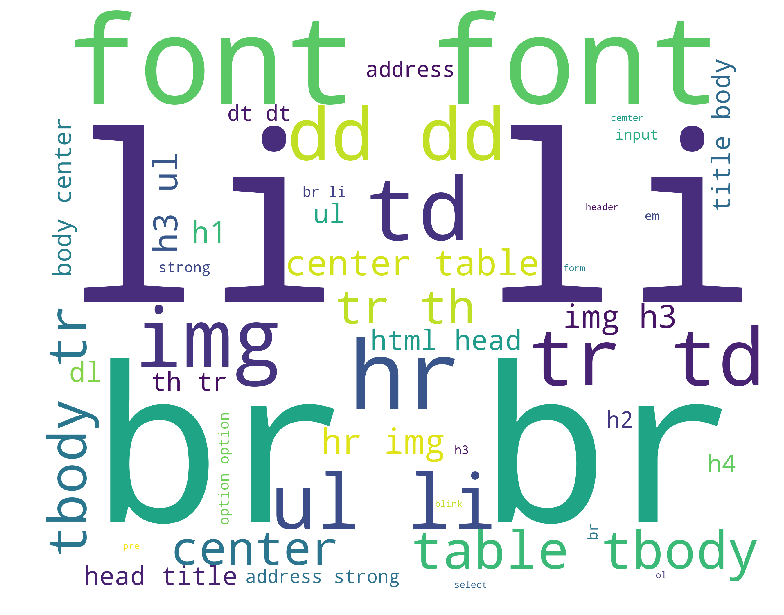

In [26]:
wordcloud_draw(tags_list)

In [27]:
rating_tags_list = []
for key, value_list in tags_ratings.items():
    rating = key.split('_')[-1]
    for value in value_list:
        rating_tags_list.append(f'{rating}_{value}')

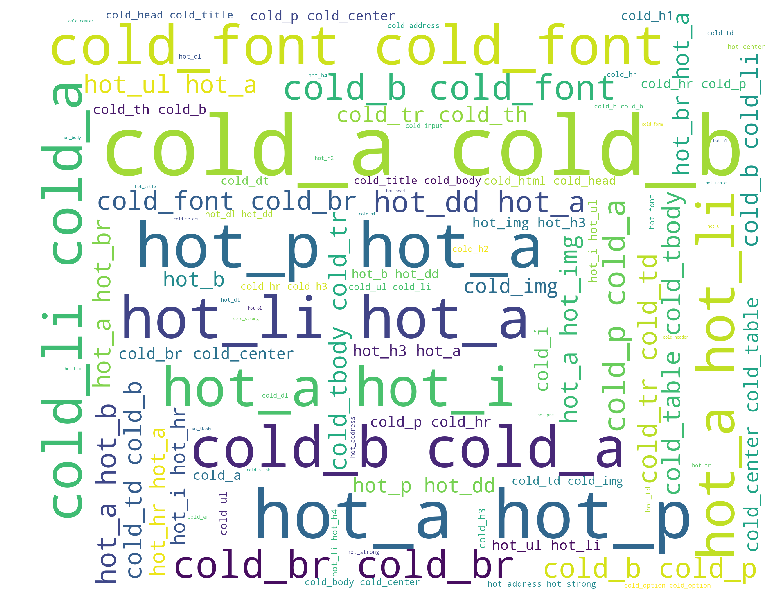

In [28]:
wordcloud_draw(rating_tags_list)

/opt/conda/envs/python36/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


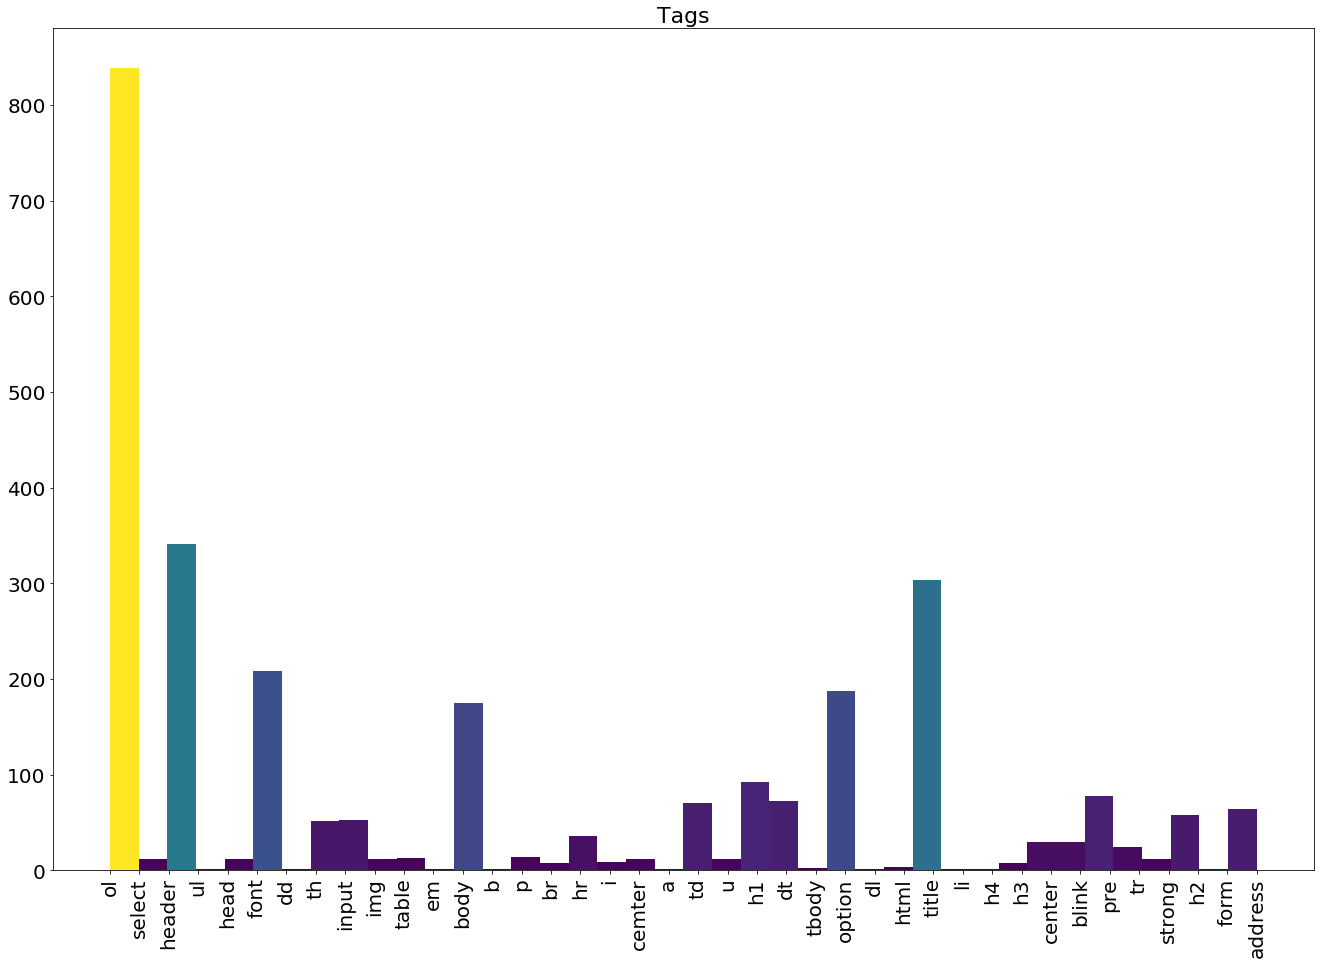

In [36]:
n_bins=len(set(tags_list))
fig, axs = plt.subplots(1, 1, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(sorted(tags_list), bins=n_bins, orientation='vertical')

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

axs.set_title("Tags", fontdict={'fontsize': 22})
plt.xticks(range(len(set(tags_list))), set(sorted(tags_list)), rotation='vertical')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
fig = plt.gcf()
fig.set_size_inches(18.5, 13.5)

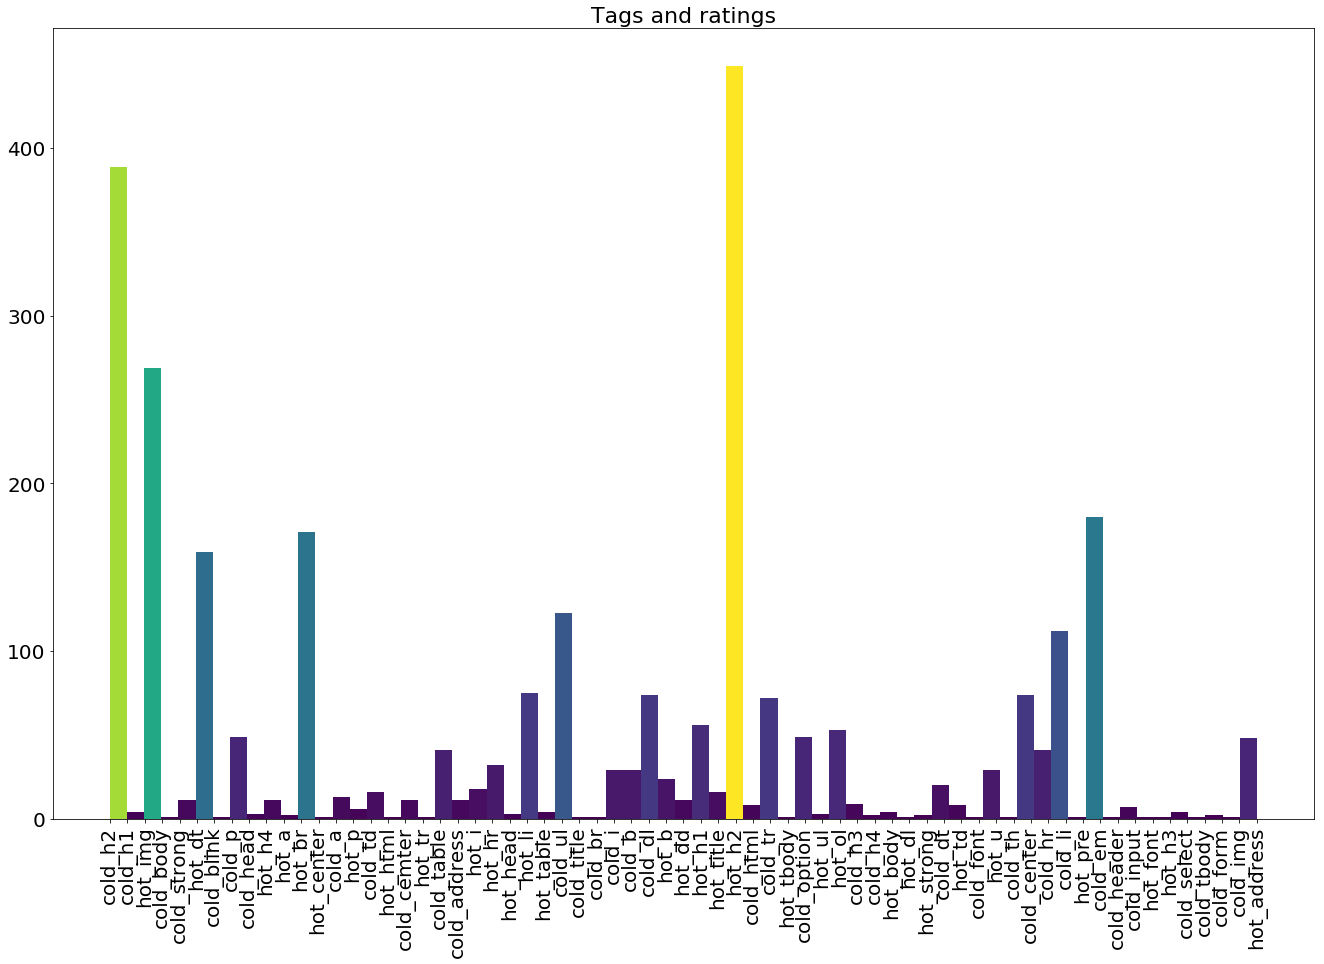

In [38]:
n_bins=len(set(rating_tags_list))
fig, axs = plt.subplots(1, 1, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(sorted(rating_tags_list), bins=n_bins, orientation='vertical')

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

axs.set_title("Tags and ratings", fontdict={'fontsize': 22})
plt.xticks(range(len(set(rating_tags_list))), set(sorted(rating_tags_list)), rotation='vertical')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
fig = plt.gcf()
fig.set_size_inches(18.5, 13.5)